In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Introduction¶
We aim to accomplist the following for this study:

Identify and visualize which factors contribute to customer churn:

Build a prediction model that will perform the following:

Classify if a customer is going to churn or not
Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

In [177]:
## import the requried LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
bank_churn = pd.read_csv('/content/bank customer churn dataset.csv')

In [179]:
bank_churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [180]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [181]:
bank_churn.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [182]:

# copy the data df variable
df = bank_churn.copy()

In [183]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Remove Irrelevant Features

In [184]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis='columns',inplace=True)

In [185]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [187]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


## Exploratory Data Analysis

In [188]:
#check ratio target variable
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [189]:
df.nunique()

,0
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4
HasCrCard,2
IsActiveMember,2
EstimatedSalary,9999


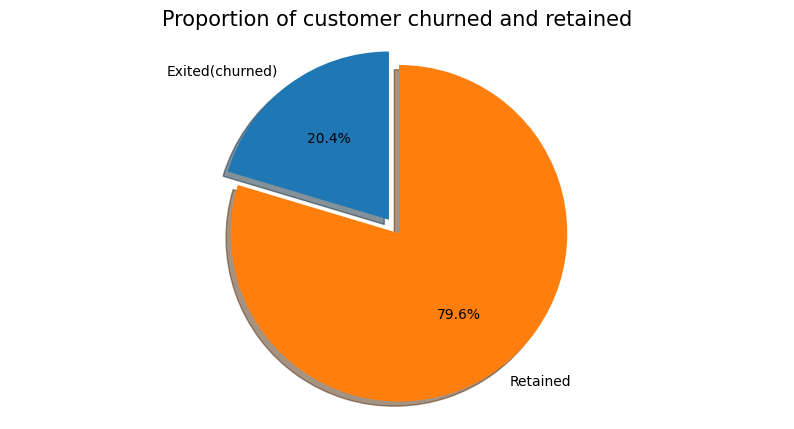

In [190]:
# we will plot a pie chart
labels = 'Exited(churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0,0.1)
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

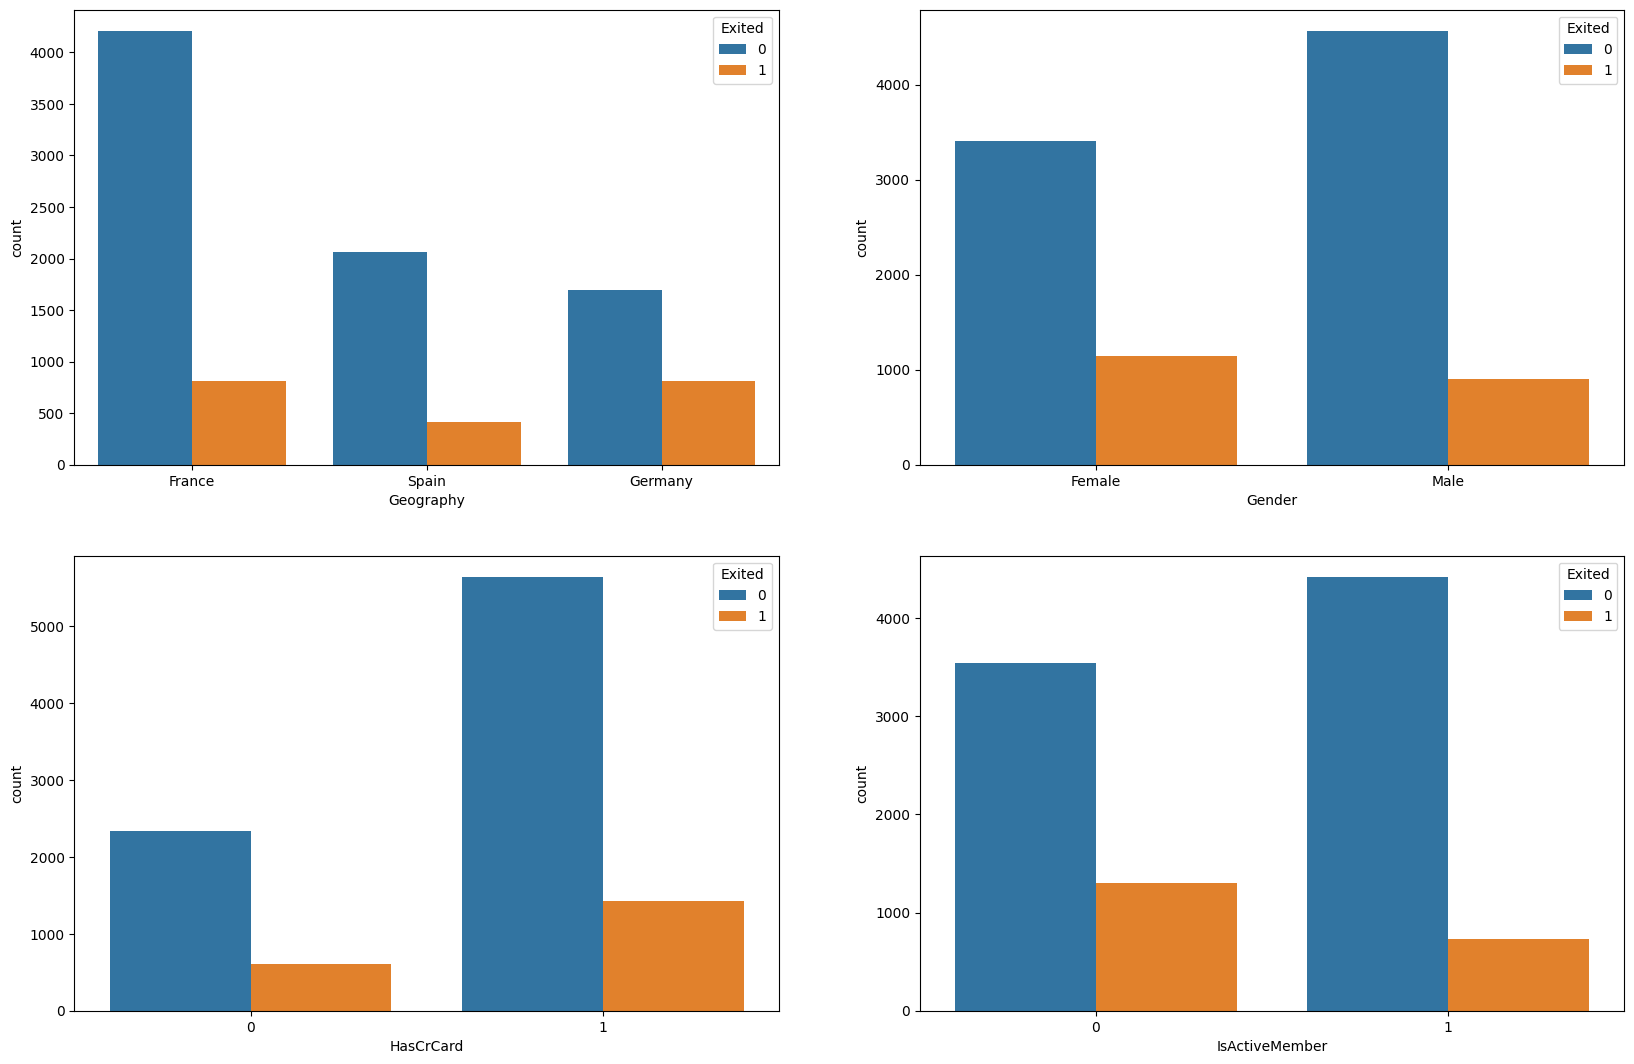

In [191]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 13))
sns.countplot(x='Geography' ,hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender',hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard' ,hue = 'Exited' ,data =df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember',hue ='Exited',data =df,ax=axarr[1][1])



<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

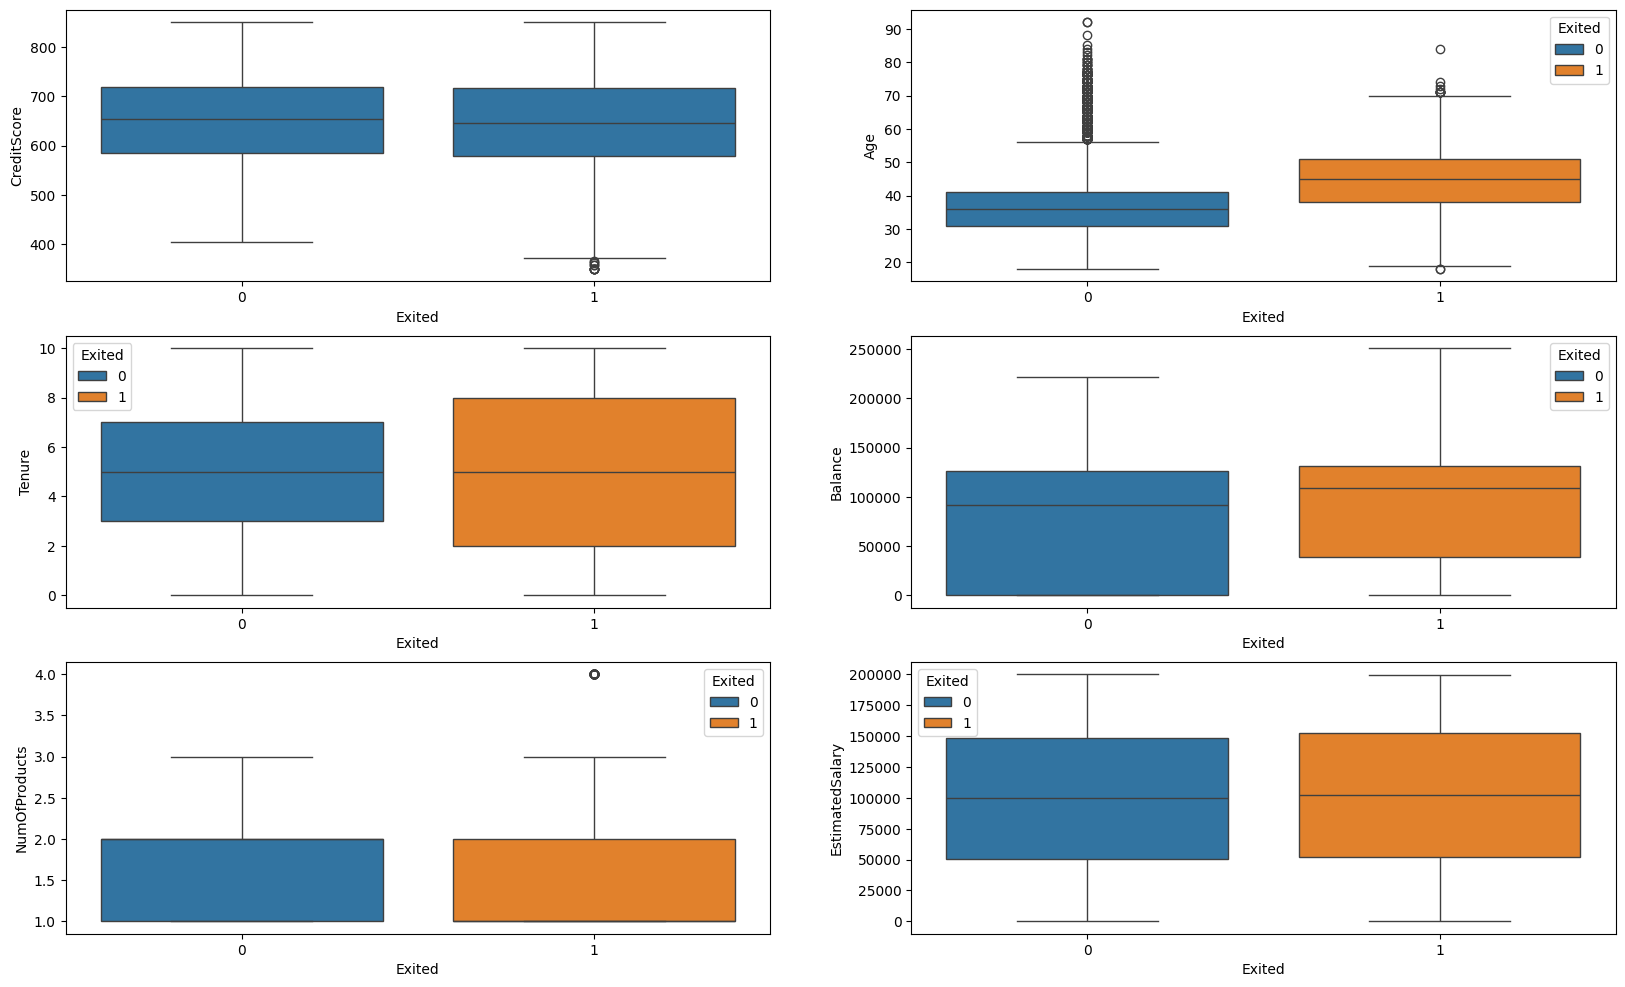

In [192]:
# Relations based on the continuous data attribute
fig, axarr = plt.subplots(3,2,figsize=(20,12))
sns.boxplot(y='CreditScore',x = 'Exited',data =df , ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited',hue= 'Exited',data =df,ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])


#  Feature engineering

# MAKING A NEW COLUMN BALANCESALARYRATIO


(-1.0, 5.0)

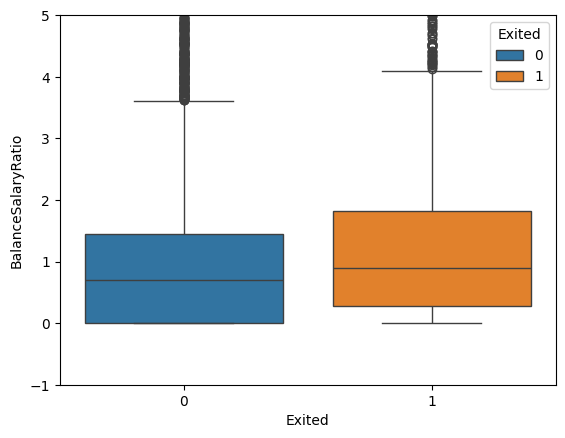

In [193]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

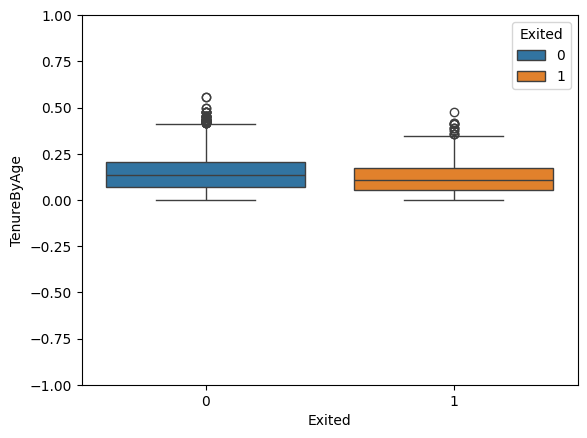

In [194]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

# Label encoding

```

```



In [195]:

df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

<ipython-input-195-5329d98c2f6d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)
<ipython-input-195-5329d98c2f6d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)


In [196]:
# one hot encoding
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1 = df1.astype(int)


In [197]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,0,0,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,0,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,1,0,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,0,0,1,0,0
4,850,0,43,2,125510,1,1,1,79084,0,1,0,0,0,1


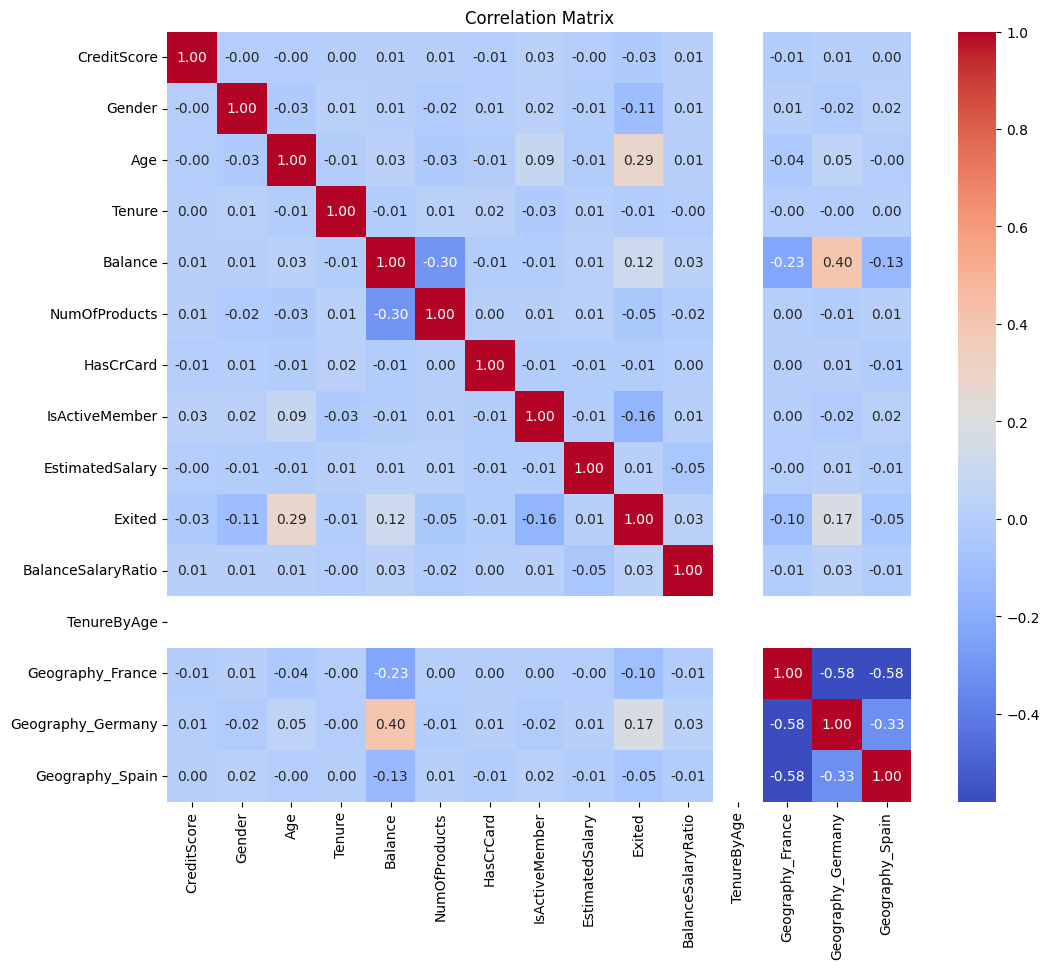

In [198]:
correlation_matrix = df1.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# SPLIT THE DATA TRAIN AND TEST

In [199]:
from sklearn.model_selection import train_test_split
X = df1.drop('Exited',axis=1)
y = df1['Exited']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [204]:
X_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'BalanceSalaryRatio',
       'TenureByAge', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

## Feature **Scaling**

In [205]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Selection

# Logistic refression

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, roc_auc_score


In [207]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [208]:
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

#evaluate
train_accuracy = accuracy_score(y_train, y_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
classification_lr = classification_report(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)


In [209]:
print("Logistic Regression Metrics:")
print(f"train_Accuracy of logistic regression {train_accuracy}")
print(f"Test_Accuracy of logistic regression {test_accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Logistic Regression Metrics:
train_Accuracy of logistic regression 0.813125
Test_Accuracy of logistic regression 0.8095
Precision of logistic regression 0.5869565217391305
Recall of logistic regression 0.2
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.59      0.20      0.30       405

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



## Handling imbalanced data with smote

In [210]:

from imblearn.over_sampling import SMOTE

In [211]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [215]:
y_res.value_counts()

,count
Exited,
1,7963
0,7963


In [216]:
# SPLIT THE RESAMPLE DATA
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=5)

In [217]:
X_train.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'BalanceSalaryRatio',
       'TenureByAge', 'Geography_France', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')

# Feature Scaling

In [218]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# logistic regression smote data

In [219]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [220]:
y_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

#evaluate
train_accuracy = accuracy_score(y_train, y_train_lr)
test_accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
classification_lr = classification_report(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)


In [222]:
print("Logistic Regression Metrics:")
print(f"train_Accuracy of logistic regression {train_accuracy}")
print(f"Test_Accuracy of logistic regression {test_accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

Logistic Regression Metrics:
train_Accuracy of logistic regression 0.8194662480376766
Test_Accuracy of logistic regression 0.827683615819209
Precision of logistic regression 0.8472775564409031
Recall of logistic regression 0.8
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      1591
           1       0.85      0.80      0.82      1595

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



# support vector classifier (svc)

In [223]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train,y_train)


SVC()

In [224]:
svm.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1])

In [225]:
y_train_svm = svm.predict(X_train)
y_pred_svm = svm.predict(X_test)


#evaluate
train_accuracy = accuracy_score(y_train, y_train_svm)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
classification_svm = classification_report(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)



In [226]:
print("support vector classifier Metrics:")
print(f"train_Accuracy of svm {train_accuracy}")
print(f"Test_Accuracy of svm {test_accuracy_svm}")
print(f"Precision of svm {precision_svm}")
print(f"Recall of svm {recall_svm}")
print(f"Classification Report of svm\n {classification_svm}")

support vector classifier Metrics:
train_Accuracy of svm 0.8727629513343799
Test_Accuracy of svm 0.8662900188323918
Precision of svm 0.8995215311004785
Recall of svm 0.8250783699059561
Classification Report of svm
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1591
           1       0.90      0.83      0.86      1595

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



## KNeighbors Classifier

In [227]:
from sklearn.neighbors import KNeighborsClassifier

In [228]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [229]:
y_pred_knn= knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
classification_knn = classification_report(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [230]:
print("KNeighbors Classifier Metrics:")
print(f"Test_Accuracy of knn {test_accuracy_knn}")
print(f"Precision of knn {precision_knn}")
print(f"Recall of knn {recall_knn}")
print(f"Classification Report of knn\n {classification_knn}")

KNeighbors Classifier Metrics:
Test_Accuracy of knn 0.8531073446327684
Precision of knn 0.8600638977635783
Recall of knn 0.8438871473354232
Classification Report of knn
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      1591
           1       0.86      0.84      0.85      1595

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



# Desicion Tree Classifier

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [233]:
y_pred_dt= dt.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
classification_dt = classification_report(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [234]:
print(f"test_Accuracy of decision tree{test_accuracy_dt}")
print(f"Precision of decision tree {precision_dt}")
print(f"Recall of decision tree {recall_dt}")
print(f"Classification Report of decision tree\n {classification_dt}")

test_Accuracy of decision tree0.8317639673571877
Precision of decision tree 0.8234575442883323
Recall of decision tree 0.845141065830721
Classification Report of decision tree
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      1591
           1       0.82      0.85      0.83      1595

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



# Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [237]:
y_pred_rf= rf.predict(X_test)
y_scores = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores)
auc_score_rf = roc_auc_score(y_test, y_scores)

test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
classification_rf = classification_report(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

In [238]:
print(f"test_Accuracy of Random forest {test_accuracy_rf}")
print(f"Precision of Random forest {precision_rf}")
print(f"Recall of Random forest {recall_rf}")
print(f"Classification Report of Random forest\n {classification_rf}")
print(f" ROC-AUC: {roc_auc_rf}")

test_Accuracy of Random forest 0.8857501569365976
Precision of Random forest 0.8932907348242811
Recall of Random forest 0.8764890282131661
Classification Report of Random forest
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1591
           1       0.89      0.88      0.88      1595

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

 ROC-AUC: 0.8857617988331701


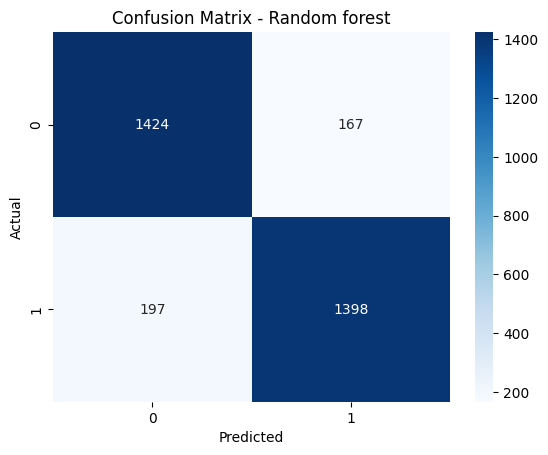

In [239]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

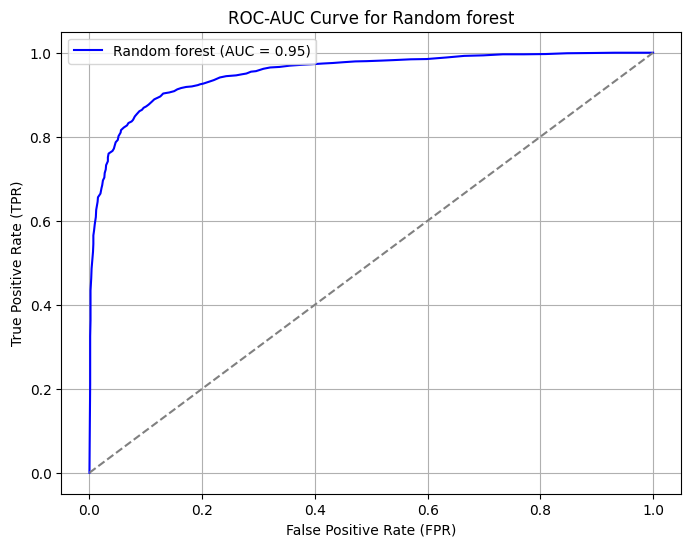

In [240]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random forest (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for Random forest")
plt.legend()
plt.grid()
plt.show()

# Gradient Boosting Classifier

In [241]:
from sklearn.ensemble import GradientBoostingClassifier

In [242]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [243]:
y_pred_gbc= gbc.predict(X_test)
test_accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
classification_gbc = classification_report(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc)

In [244]:
print(f"test_Accuracy of Gradient Boosting {test_accuracy_gbc}")
print(f"Precision of Gradient Boosting{precision_gbc}")
print(f"Recall ofGradient Boosting {recall_gbc}")
print(f"Classification Report of Gradient Boosting\n {classification_gbc}")

test_Accuracy of Gradient Boosting 0.8684871311989956
Precision of Gradient Boosting0.8823146944083224
Recall ofGradient Boosting 0.8507836990595611
Classification Report of Gradient Boosting
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1591
           1       0.88      0.85      0.87      1595

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186



# XGBoost

In [245]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(random_state=42, verbosity = 0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [246]:
y_pred_xgb = model_xgb.predict(X_test)
y_scores = model_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores)
auc_score_xgb = roc_auc_score(y_test, y_scores)

test_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
classification_xgb = classification_report(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)


In [247]:
print(f"test_Accuracy of xgboost {test_accuracy_xgb}")
print(f"Precision of xgboost {precision_xgb}")
print(f"Recall ofxgboost  {recall_xgb}")
print(f"Classification Report of xgboost \n {classification_xgb}")
print(f" ROC-AUC: {roc_auc_xgb}")


test_Accuracy of xgboost 0.879472693032015
Precision of xgboost 0.8878923766816144
Recall ofxgboost  0.8689655172413793
Classification Report of xgboost 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1591
           1       0.89      0.87      0.88      1595

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186

 ROC-AUC: 0.879485901298251


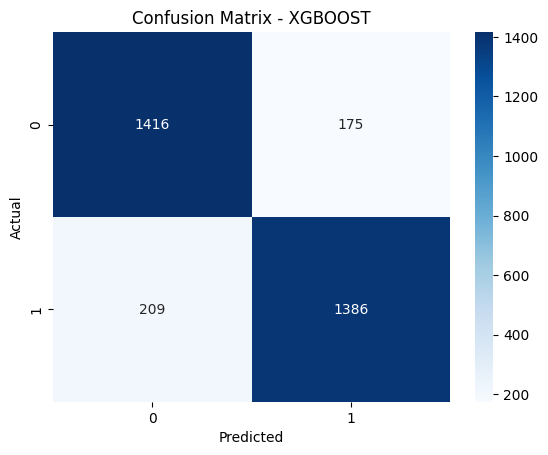

In [248]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBOOST")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

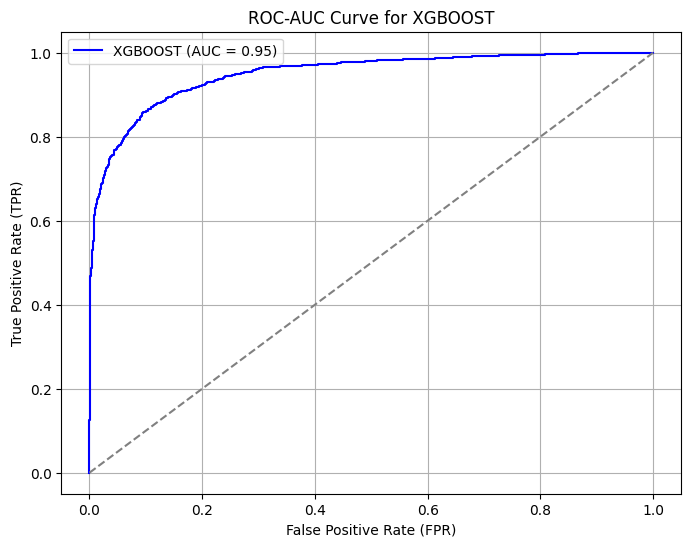

In [249]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='blue', label=f'XGBOOST (AUC = {auc_score_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve for XGBOOST")
plt.legend()
plt.grid()
plt.show()

# Accuracy Summary

In [250]:
performance_summary = pd.DataFrame({
    'Model':['LR','SVC','KNN','DT','RF','GBC','XGB'],
    'ACC':[accuracy_score(y_test,y_pred_lr),
           accuracy_score(y_test,y_pred_svm),
           accuracy_score(y_test,y_pred_knn),
           accuracy_score(y_test,y_pred_dt),
           accuracy_score(y_test,y_pred_rf),
           accuracy_score(y_test,y_pred_gbc),
           accuracy_score(y_test,y_pred_xgb)
          ],
    'PRECISION':[precision_score(y_test,y_pred_lr),
           precision_score(y_test,y_pred_svm),
           precision_score(y_test,y_pred_knn),
           precision_score(y_test,y_pred_dt),
           precision_score(y_test,y_pred_rf),
           precision_score(y_test,y_pred_gbc),
            precision_score(y_test,y_pred_xgb)
          ]
})

In [251]:
performance_summary

,Model,ACC,PRECISION
0,LR,0.827684,0.847278
1,SVC,0.866290,0.899522
2,KNN,0.853107,0.860064
3,DT,0.831764,0.823458
4,RF,0.885750,0.893291
5,GBC,0.868487,0.882315
6,XGB,0.879473,0.887892


<Axes: xlabel='Model', ylabel='ACC'>

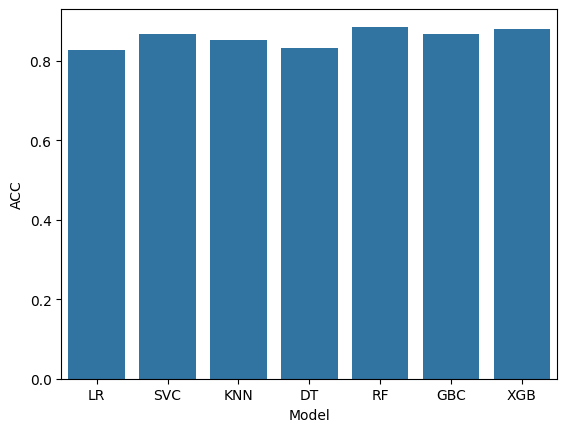

In [252]:
sns.barplot(x=performance_summary['Model'], y=performance_summary['ACC'])

<Axes: xlabel='Model', ylabel='PRECISION'>

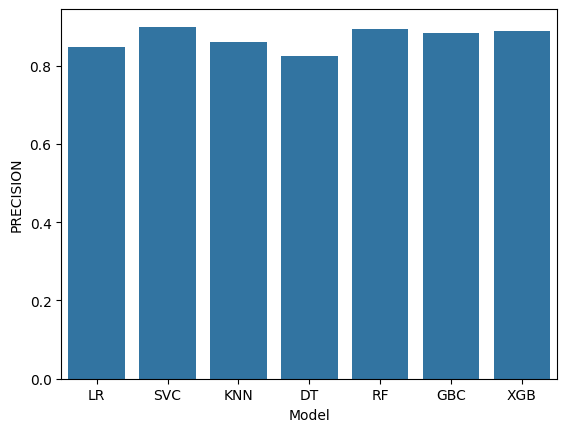

In [253]:
sns.barplot(x=performance_summary['Model'], y=performance_summary['PRECISION'])

In [256]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'BalanceSalaryRatio', 'TenureByAge', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

# Saving the best model, Random forest

In [257]:
X_train = sc.fit_transform(X_train)

In [258]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [259]:
import joblib

In [260]:
joblib.dump(rf, 'bank_churn_predict_model')

['bank_churn_predict_model']

In [261]:
model = joblib.load('bank_churn_predict_model')

In [262]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'BalanceSalaryRatio', 'TenureByAge', 'Geography_France',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')